In [1]:
import pandas as pd
import pickle
import seaborn as snb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
polar_halfs_dat = pd.read_pickle('MTFHalfPolar.p')
interp_halfs_dat = pd.read_pickle('MTFHalfInterp.p')

In [4]:
grouped_polar = polar_halfs_dat.groupby(['Soffset','Doffset'])

polar_halfs = {}
for a,b in grouped_polar:
    group = b[['xslice','yslice','zslice','xslice_radius','yslice_radius','zslice_radius','xslice_slope','yslice_slope','zslice_slope','mag','Soffset','Doffset']]
    polar_halfs[a] = {'means':group.groupby("mag").mean(),
                 'vars':group.groupby("mag").var(ddof=1),
                'stds':group.groupby("mag").std(ddof=1)}

grouped_interp = interp_halfs_dat.groupby(['S','D'])

interp_halfs = {}
for a,b in grouped_interp:
    group = b[['X1','X2','X3','X4','Y1','Y2','Y3','Y4','Z1','Z2','Z3','Z4','mag','D','S']]
    interp_halfs[a] = {'means':group.groupby("mag").mean(),
                 'vars':group.groupby("mag").var(ddof=1),
                'stds':group.groupby("mag").std(ddof=1)}

In [7]:
S1D1 = interp_halfs[(1,1)]['means']
avs_S1D1 = pd.DataFrame(columns=['X','Y','Z'])
avs_S1D1.X = S1D1[['X1','X2','X3','X4']].transpose().mean()
avs_S1D1.Y = S1D1[['Y1','Y2','Y3','Y4']].transpose().mean()
avs_S1D1.Z = S1D1[['Z1','Z2','Z3','Z4']].transpose().mean()

S1D1 = interp_halfs[(1,1)]['stds']
stds_S1D1 = pd.DataFrame(columns=['X','Y','Z'])
stds_S1D1.X = S1D1[['X1','X2','X3','X4']].transpose().mean()
stds_S1D1.Y = S1D1[['Y1','Y2','Y3','Y4']].transpose().mean()
stds_S1D1.Z = S1D1[['Z1','Z2','Z3','Z4']].transpose().mean()


S0D1 = interp_halfs[(0,1)]['means']
avs_S0D1 = pd.DataFrame(columns=['X','Y','Z'])
avs_S0D1.X = S0D1[['X1','X2','X3','X4']].transpose().mean()
avs_S0D1.Y = S0D1[['Y1','Y2','Y3','Y4']].transpose().mean()
avs_S0D1.Z = S0D1[['Z1','Z2','Z3','Z4']].transpose().mean()

S0D1 = interp_halfs[(0,1)]['stds']
stds_S0D1 = pd.DataFrame(columns=['X','Y','Z'])
stds_S0D1.X = S0D1[['X1','X2','X3','X4']].transpose().mean()
stds_S0D1.Y = S0D1[['Y1','Y2','Y3','Y4']].transpose().mean()
stds_S0D1.Z = S0D1[['Z1','Z2','Z3','Z4']].transpose().mean()

S1D0 = interp_halfs[(1,0)]['means']
avs_S1D0 = pd.DataFrame(columns=['X','Y','Z'])
avs_S1D0.X = S1D0[['X1','X2','X3','X4']].transpose().mean()
avs_S1D0.Y = S1D0[['Y1','Y2','Y3','Y4']].transpose().mean()
avs_S1D0.Z = S1D0[['Z1','Z2','Z3','Z4']].transpose().mean()

S1D0 = interp_halfs[(1,0)]['stds']
stds_S1D0 = pd.DataFrame(columns=['X','Y','Z'])
stds_S1D0.X = S1D0[['X1','X2','X3','X4']].transpose().mean()
stds_S1D0.Y = S1D0[['Y1','Y2','Y3','Y4']].transpose().mean()
stds_S1D0.Z = S1D0[['Z1','Z2','Z3','Z4']].transpose().mean()

S0D0 = interp_halfs[(0,0)]['means']
avs_S0D0 = pd.DataFrame(columns=['X','Y','Z'])
avs_S0D0.X = S0D0[['X1','X2','X3','X4']].transpose().mean()
avs_S0D0.Y = S0D0[['Y1','Y2','Y3','Y4']].transpose().mean()
avs_S0D0.Z = S0D0[['Z1','Z2','Z3','Z4']].transpose().mean()

S0D0 = interp_halfs[(0,0)]['stds']
stds_S0D0 = pd.DataFrame(columns=['X','Y','Z'])
stds_S0D0.X = S0D0[['X1','X2','X3','X4']].transpose().mean()
stds_S0D0.Y = S0D0[['Y1','Y2','Y3','Y4']].transpose().mean()
stds_S0D0.Z = S0D0[['Z1','Z2','Z3','Z4']].transpose().mean()

In [10]:
from scipy.optimize import curve_fit
mags = polar_halfs[(0,1)]['stds'].index

def recip(x,A,B):
    return A/x + B

def lin(x,A,B):
    return A*x + B

def reciplin(x,A,B,C,D):
    return A*np.exp(-B*x) + C*x + D

popt1_e, pcov = curve_fit(recip, mags.data.tolist(), polar_halfs[(1,0)]['means'].xslice.as_matrix())
popt2_e, pcov = curve_fit(recip, mags.data.tolist(), polar_halfs[(1,0)]['means'].yslice.as_matrix())
popt3_e, pcov = curve_fit(recip, mags.data.tolist(), polar_halfs[(1,0)]['means'].zslice.as_matrix())

popt4_e, pcov = curve_fit(recip, mags.data.tolist(), avs_S1D0.X.as_matrix())
popt5_e, pcov = curve_fit(recip, mags.data.tolist(), avs_S1D0.Y.as_matrix())
popt6_e, pcov = curve_fit(recip, mags.data.tolist(), avs_S1D0.Z.as_matrix())

rmse_px10 = np.sqrt(np.mean((recip(np.array(mags.data.tolist()),*popt1_e)-polar_halfs[(1,0)]['means'].xslice.as_matrix())**2))
rmse_py10 = np.sqrt(np.mean((recip(np.array(mags.data.tolist()),*popt2_e)-polar_halfs[(1,0)]['means'].yslice.as_matrix())**2))
rmse_pz10 = np.sqrt(np.mean((recip(np.array(mags.data.tolist()),*popt3_e)-polar_halfs[(1,0)]['means'].zslice.as_matrix())**2))

rmse_ix10 = np.sqrt(np.mean((recip(np.array(mags.data.tolist()),*popt4_e)-avs_S1D0.X.as_matrix())**2))
rmse_ix10 = np.sqrt(np.mean((recip(np.array(mags.data.tolist()),*popt5_e)-avs_S1D0.Y.as_matrix())**2))
rmse_ix10 = np.sqrt(np.mean((recip(np.array(mags.data.tolist()),*popt6_e)-avs_S1D0.Z.as_matrix())**2))

popt1_l, pcov = curve_fit(lin, mags.data.tolist(), polar_halfs[(0,1)]['means'].xslice.as_matrix())
popt2_l, pcov = curve_fit(lin, mags.data.tolist(), polar_halfs[(0,1)]['means'].yslice.as_matrix())
popt3_l, pcov = curve_fit(lin, mags.data.tolist(), polar_halfs[(0,1)]['means'].zslice.as_matrix())

popt4_l, pcov = curve_fit(lin, mags.data.tolist(), avs_S0D1.X.as_matrix())
popt5_l, pcov = curve_fit(lin, mags.data.tolist(), avs_S0D1.Y.as_matrix())
popt6_l, pcov = curve_fit(lin, mags.data.tolist(), avs_S0D1.Z.as_matrix())

rmse_px01 = np.sqrt(np.mean((lin(np.array(mags.data.tolist()),*popt1_l)-polar_halfs[(0,1)]['means'].xslice.as_matrix())**2))
rmse_py01 = np.sqrt(np.mean((lin(np.array(mags.data.tolist()),*popt2_l)-polar_halfs[(0,1)]['means'].yslice.as_matrix())**2))
rmse_pz01 = np.sqrt(np.mean((lin(np.array(mags.data.tolist()),*popt3_l)-polar_halfs[(0,1)]['means'].zslice.as_matrix())**2))

rmse_ix01 = np.sqrt(np.mean((lin(np.array(mags.data.tolist()),*popt4_l)-avs_S0D1.X.as_matrix())**2))
rmse_iy01 = np.sqrt(np.mean((lin(np.array(mags.data.tolist()),*popt5_l)-avs_S0D1.Y.as_matrix())**2))
rmse_iz01 = np.sqrt(np.mean((lin(np.array(mags.data.tolist()),*popt6_l)-avs_S0D1.Z.as_matrix())**2))

popt1, pcov = curve_fit(reciplin, mags.data.tolist(), polar_halfs[(1,1)]['means'].xslice.as_matrix())
popt2, pcov = curve_fit(reciplin, mags.data.tolist(), polar_halfs[(1,1)]['means'].yslice.as_matrix())
popt3, pcov = curve_fit(reciplin, mags.data.tolist(), polar_halfs[(1,1)]['means'].zslice.as_matrix())

popt4, pcov = curve_fit(reciplin, mags.data.tolist(), avs_S1D1.X.as_matrix())
popt5, pcov = curve_fit(reciplin, mags.data.tolist(), avs_S1D1.Y.as_matrix())
popt6, pcov = curve_fit(reciplin, mags.data.tolist(), avs_S1D1.Z.as_matrix())

rmse_px11 = np.sqrt(np.mean((reciplin(np.array(mags.data.tolist()),*popt1)-polar_halfs[(1,1)]['means'].xslice.as_matrix())**2))
rmse_py11 = np.sqrt(np.mean((reciplin(np.array(mags.data.tolist()),*popt2)-polar_halfs[(1,1)]['means'].yslice.as_matrix())**2))
rmse_pz11 = np.sqrt(np.mean((reciplin(np.array(mags.data.tolist()),*popt3)-polar_halfs[(1,1)]['means'].zslice.as_matrix())**2))

rmse_ix11 = np.sqrt(np.mean((reciplin(np.array(mags.data.tolist()),*popt4)-avs_S1D1.X.as_matrix())**2))
rmse_iy11 = np.sqrt(np.mean((reciplin(np.array(mags.data.tolist()),*popt5)-avs_S1D1.Y.as_matrix())**2))
rmse_iz11 = np.sqrt(np.mean((reciplin(np.array(mags.data.tolist()),*popt6)-avs_S1D1.Z.as_matrix())**2))

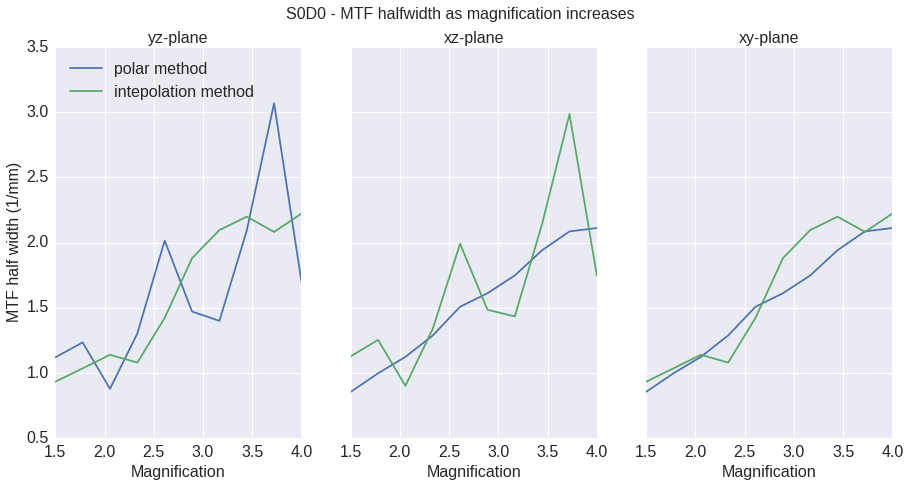

In [13]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1,figsize = (15,7),sharey=True)

fig.suptitle('S0D0 - MTF halfwidth as magnification increases',fontsize=16)

polar_halfs[(0,0)]['means'].xslice.plot(ax=ax1,label='polar method',fontsize=16)
avs_S0D0.X.plot(ax=ax1,label = 'intepolation method',fontsize=16)
ax1.legend(loc=0,fontsize=16)
ax1.set_ylabel('MTF half width (1/mm)',fontsize = 16)
ax1.set_xlabel('Magnification',fontsize = 16)
ax1.set_title("yz-plane",fontsize = 16)
ax1.tick_params(axis='both', which='major', labelsize=16)

polar_halfs[(0,0)]['means'].yslice.plot(ax=ax2,label='polar method',fontsize=16)
avs_S0D0.Y.plot(ax=ax2,label = 'intepolation method',fontsize=16)
ax2.set_title("xz-plane",fontsize = 16)
ax2.set_xlabel('Magnification',fontsize = 16)
ax2.tick_params(axis='both', which='major', labelsize=16)

polar_halfs[(0,0)]['means'].zslice.plot(ax=ax3,label='polar method',fontsize=16)
avs_S0D0.Z.plot(ax=ax3,label = 'intepolation method',fontsize=16)
ax3.set_title("xy-plane",fontsize = 16)
ax3.tick_params(axis='both', which='major', labelsize=16)
ax3.set_xlabel('Magnification',fontsize = 16)

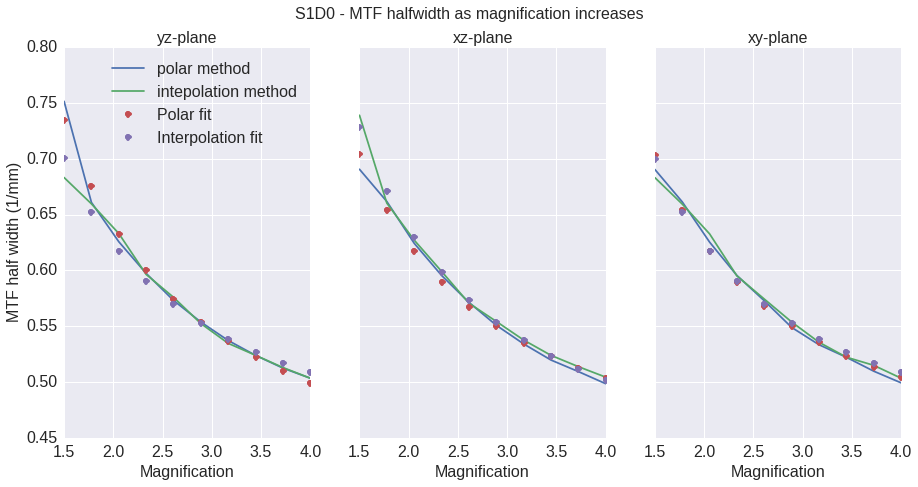

In [14]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1,figsize = (15,7),sharey=True)

fig.suptitle('S1D0 - MTF halfwidth as magnification increases',fontsize=16)

polar_halfs[(1,0)]['means'].xslice.plot(ax=ax1,label='polar method',fontsize=16)
avs_S1D0.X.plot(ax=ax1,label = 'intepolation method',fontsize=16)
ax1.plot(mags.data.tolist(),recip(np.array(mags.data.tolist()),*popt1_e),'o',label = 'Polar fit')
ax1.plot(mags.data.tolist(),recip(np.array(mags.data.tolist()),*popt4_e),'o',label = 'Interpolation fit')
ax1.legend(loc=0,fontsize=16)
ax1.set_xlabel('Magnification',fontsize = 16)
ax1.set_title("yz-plane",fontsize = 16)
ax1.set_ylabel('MTF half width (1/mm)',fontsize = 16)
ax1.tick_params(axis='both', which='major', labelsize=16)

polar_halfs[(1,0)]['means'].yslice.plot(ax=ax2,label='polar method',fontsize=16)
avs_S1D0.Y.plot(ax=ax2,label = 'intepolation method',fontsize=16)
ax2.plot(mags.data.tolist(),recip(np.array(mags.data.tolist()),*popt2_e),'o',label = 'Polar fit')
ax2.plot(mags.data.tolist(),recip(np.array(mags.data.tolist()),*popt5_e),'o',label = 'Interpolation fit')
ax2.set_title("xz-plane",fontsize = 16)
ax2.set_xlabel('Magnification',fontsize = 16)
ax2.tick_params(axis='both', which='major', labelsize=16)

polar_halfs[(1,0)]['means'].zslice.plot(ax=ax3,label='polar method',fontsize=16)
avs_S1D0.Z.plot(ax=ax3,label = 'intepolation method',fontsize=16)
ax3.plot(mags.data.tolist(),recip(np.array(mags.data.tolist()),*popt3_e),'o',label = 'Polar fit')
ax3.plot(mags.data.tolist(),recip(np.array(mags.data.tolist()),*popt6_e),'o',label = 'Interpolation fit')
ax3.set_title("xy-plane",fontsize = 16)
ax3.set_xlabel('Magnification',fontsize = 16)
ax3.tick_params(axis='both', which='major', labelsize=16)

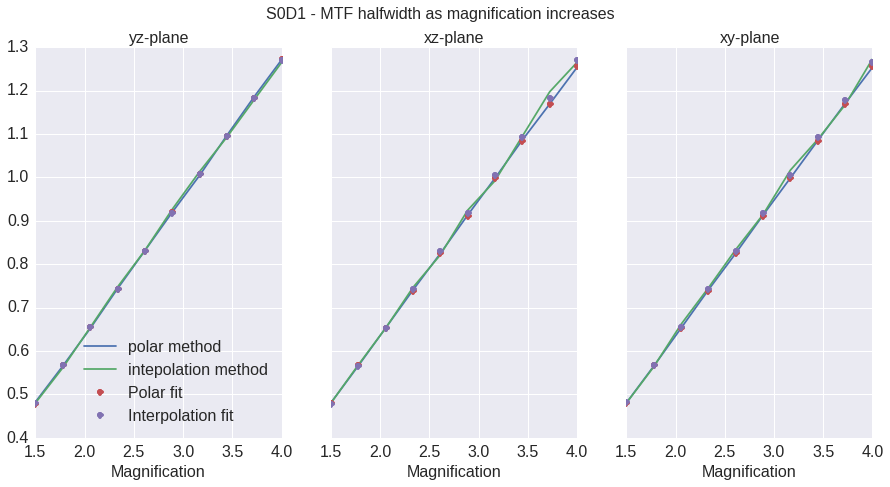

In [15]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1,figsize = (15,7),sharey=True)

fig.suptitle('S0D1 - MTF halfwidth as magnification increases',fontsize=16)

polar_halfs[(0,1)]['means'].xslice.plot(ax=ax1,label='polar method',fontsize=16)
avs_S0D1.X.plot(ax=ax1,label = 'intepolation method',fontsize=16)
ax1.plot(mags.data.tolist(),lin(np.array(mags.data.tolist()),*popt1_l),'o',label = 'Polar fit')
ax1.plot(mags.data.tolist(),lin(np.array(mags.data.tolist()),*popt4_l),'o',label = 'Interpolation fit')
ax1.legend(loc=0,fontsize=16)
ax1.set_title("yz-plane",fontsize = 16)
ax1.set_xlabel('Magnification',fontsize = 16)
ax1.tick_params(axis='both', which='major', labelsize=16)

polar_halfs[(0,1)]['means'].yslice.plot(ax=ax2,label='polar method',fontsize=16)
avs_S0D1.Y.plot(ax=ax2,label = 'intepolation method',fontsize=16)
ax2.plot(mags.data.tolist(),lin(np.array(mags.data.tolist()),*popt2_l),'o',label = 'Polar fit')
ax2.plot(mags.data.tolist(),lin(np.array(mags.data.tolist()),*popt5_l),'o',label = 'Interpolation fit')
ax2.set_title("xz-plane",fontsize = 16)
ax2.set_xlabel('Magnification',fontsize = 16)
ax2.tick_params(axis='both', which='major', labelsize=16)

polar_halfs[(0,1)]['means'].zslice.plot(ax=ax3,label='polar method',fontsize=16)
avs_S0D1.Z.plot(ax=ax3,label = 'intepolation method',fontsize=16)
ax3.plot(mags.data.tolist(),lin(np.array(mags.data.tolist()),*popt3_l),'o',label = 'Polar fit')
ax3.plot(mags.data.tolist(),lin(np.array(mags.data.tolist()),*popt6_l),'o',label = 'Interpolation fit')
ax3.set_title("xy-plane",fontsize = 16)
ax3.set_xlabel('Magnification',fontsize = 16)
ax3.tick_params(axis='both', which='major', labelsize=16)

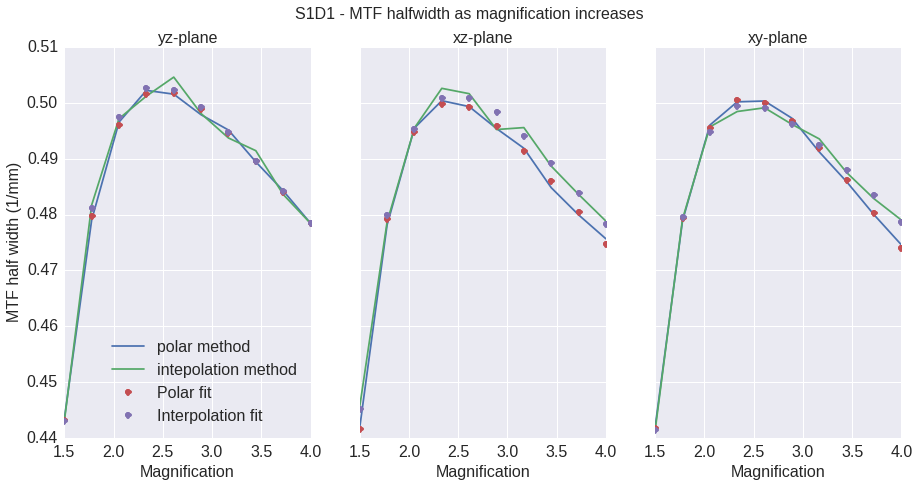

In [12]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1,figsize = (15,7),sharey=True)

fig.suptitle('S1D1 - MTF halfwidth as magnification increases',fontsize=16)

polar_halfs[(1,1)]['means'].xslice.plot(ax=ax1,label='polar method',fontsize=16)
avs_S1D1.X.plot(ax=ax1,label = 'intepolation method',fontsize=16)
ax1.plot(mags.data.tolist(),reciplin(np.array(mags.data.tolist()),*popt1),'o',label = 'Polar fit')
ax1.plot(mags.data.tolist(),reciplin(np.array(mags.data.tolist()),*popt4),'o',label = 'Interpolation fit')
ax1.legend(loc=0,fontsize=16)
ax1.set_ylabel('MTF half width (1/mm)',fontsize = 16)
ax1.set_xlabel('Magnification',fontsize = 16)
ax1.set_title("yz-plane",fontsize = 16)
ax1.tick_params(axis='both', which='major', labelsize=16)

polar_halfs[(1,1)]['means'].yslice.plot(ax=ax2,label='polar method',fontsize=16)
avs_S1D1.Y.plot(ax=ax2,label = 'intepolation method',fontsize=16)
ax2.plot(mags.data.tolist(),reciplin(np.array(mags.data.tolist()),*popt2),'o',label = 'Polar fit')
ax2.plot(mags.data.tolist(),reciplin(np.array(mags.data.tolist()),*popt5),'o',label = 'Interpolation fit')
ax2.set_title("xz-plane",fontsize = 16)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.set_xlabel('Magnification',fontsize = 16)

polar_halfs[(1,1)]['means'].zslice.plot(ax=ax3,label='polar method',fontsize=16)
avs_S1D1.Z.plot(ax=ax3,label = 'intepolation method',fontsize=16)
ax3.plot(mags.data.tolist(),reciplin(np.array(mags.data.tolist()),*popt3),'o',label = 'Polar fit')
ax3.plot(mags.data.tolist(),reciplin(np.array(mags.data.tolist()),*popt6),'o',label = 'Interpolation fit')
ax3.set_title("xy-plane",fontsize = 16)
ax3.tick_params(axis='both', which='major', labelsize=16)
ax3.set_xlabel('Magnification',fontsize = 16)

In [16]:
S1D0 = polar_halfs[(1,0)]['means'].xslice_radius.apply(lambda x:np.abs(x-30)/30).as_matrix()
S0D1 = polar_halfs[(0,1)]['means'].xslice_radius.apply(lambda x:np.abs(x-30)/30).as_matrix()
S1D1 = polar_halfs[(1,1)]['means'].xslice_radius.apply(lambda x:np.abs(x-30)/30).as_matrix()

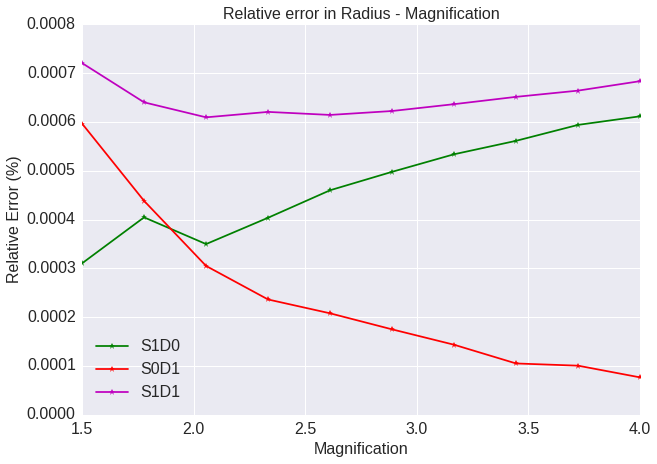

In [18]:
mags = polar_halfs_dat.mag.unique()
fig,ax = plt.subplots(ncols=1,nrows=1,figsize = (10,7))
ax.plot(mags,S1D0,'g*-',label="S1D0")
ax.plot(mags,S0D1,'r*-',label="S0D1")
ax.plot(mags,S1D1,'m*-',label="S1D1")

ax.legend(loc=0,fontsize=16)
ax.set_title("Relative error in Radius - Magnification",fontsize = 16)
ax.set_ylabel("Relative Error (%)",fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel("Magnification",fontsize = 16);